In [ ]:
# GBM - 와인데이터셋

In [ ]:
# GBM 수행시간 측정

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [10]:
wine = load_wine()
# 와인 데이터에서 feature 로 되어있는 데이터를 갖고 오기
wine_data = wine.data
# 와인 데이터에서 target 데이터를 갖고 오기
wine_target = wine.target
# wine 데이터의 feature, target로 Dataframe을 만들기
df_wine = pd.DataFrame(data = wine_data, columns=[wine.feature_names])
# feature 만 있는 데이터 프레임에 타겟 데이터를 추가하기
df_wine['target'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size=0.3)

print(X_train.shape, X_test.shape)

(124, 13) (54, 13)


In [ ]:
# 문제1

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9444
GBM 수행 시간: 1.5 초 


In [ ]:
# GBM 하이퍼 파라미터 튜닝
# 문제2

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'learning_rate' : [0.02, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("GBM 정확도: {0:.4f}".format(gb_accuracy))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 300}
최고 예측 정확도: 0.9507
GBM 정확도: 0.9444


In [ ]:
# 문제3

1. n_estimators의 개념
: 총 반복학습 횟수, 학습기를 몇 개 사용할지를 결정하는 개념, 기본적으로 많을수록 모델의 성능이 높아질 수 있으나 너무 크게 설정할 경우 과적합 위험이 있음.

2. learning_rate의 개념
: 각 학습기가 예측한 값을 얼마나 반영할지 조절하는 학습률. 작게 설정할수록 각 학습기의 영향력을 줄이고, 더 많은 학습기의 학습을 요구함. 크게 설정하면 적은 학습기로도 빠르게 학습하지만 과적합 발생 가능성이 높음.

2-1) 너무 작은 learning_rate를 적용할 경우 발생하는 현상
: 많은 학습기가 필요하며 학습시간이 길어지고 계산량이 많아짐, 일반적으로 과적합 방지가 가능.

2-2) 너무 큰 learning_rate를 적용할 경우 발생하는 현상
: 각 학습기에 따른 영향이 커, 모델이 급격하게 변화함. 과적합 발생 가능성이 높음.

In [ ]:
# XGBoost - 위스콘신 유방암 데이터 세트

In [12]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [13]:
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [14]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [ ]:
# 문제4

In [15]:
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [16]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# 문제5

DMatrix

In [ ]:
# 문제6

In [17]:
params = {
    'max_depth': 4,
    'eta': 0.03,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

num_rounds = 300

In [ ]:
# 문제7

In [18]:
eval_list = [(dtr, 'train'),(dval, 'eval')]

xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds, \
                      early_stopping_rounds=60, evals=eval_list)

[0]	train-logloss:0.63607	eval-logloss:0.62529
[1]	train-logloss:0.61211	eval-logloss:0.60288
[2]	train-logloss:0.58956	eval-logloss:0.58182
[3]	train-logloss:0.56830	eval-logloss:0.56222
[4]	train-logloss:0.54817	eval-logloss:0.54333
[5]	train-logloss:0.52890	eval-logloss:0.52586
[6]	train-logloss:0.51065	eval-logloss:0.50935
[7]	train-logloss:0.49316	eval-logloss:0.49255
[8]	train-logloss:0.47654	eval-logloss:0.47619
[9]	train-logloss:0.46085	eval-logloss:0.46114
[10]	train-logloss:0.44577	eval-logloss:0.44694
[11]	train-logloss:0.43140	eval-logloss:0.43320
[12]	train-logloss:0.41796	eval-logloss:0.42082
[13]	train-logloss:0.40492	eval-logloss:0.40877
[14]	train-logloss:0.39236	eval-logloss:0.39702
[15]	train-logloss:0.38060	eval-logloss:0.38627
[16]	train-logloss:0.36916	eval-logloss:0.37523
[17]	train-logloss:0.35793	eval-logloss:0.36477
[18]	train-logloss:0.34757	eval-logloss:0.35566
[19]	train-logloss:0.33731	eval-logloss:0.34632
[20]	train-logloss:0.32752	eval-logloss:0.33777
[2

In [ ]:
# 문제8

1. 머신러닝 모델이 학습 도중 검증 성능이 더 개선된다고 판단하지 않을 시, 학습을 조기종료하는 것

2. early_stopping_rounds=60 이므로, 검증 데이터의 logloss가 60회 동안 개선되지 않으면 학습을 중단하게 됨

In [19]:
dtest = xgb.DMatrix(data=X_test, label=y_test)
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])


predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.991 0.003 0.002 0.998 0.999 0.002 0.002 0.125 0.126 0.999]
예측값 10개만 표시: [1, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [ ]:
# 문제9

<Axes: >

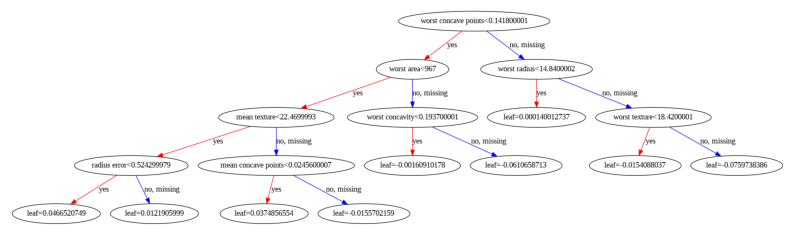

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
xgb.plot_tree(xgb_model, ax=ax)

In [ ]:
# LightGBM

In [ ]:
# 문제1

반복적으로 모델 학습을 진행해야 하므로, 시간이 오래 걸린다는 문제가 발생. XGBoost는 순차적으로 학습하는 구조이기 때문에 n_estimators가 많을 수록 학습시간이 길어짐.

In [ ]:
# 문제2

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

diabetes_data = pd.read_csv("/content/drive/MyDrive/EuronData/diabetes.csv")

X_features = diabetes_data.iloc[:, :-1].values
y_label = diabetes_data.iloc[:, -1].values

Mounted at /content/drive


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
# 문제3

In [24]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [26]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=100, learning_rate=0.1)

In [27]:
import lightgbm
from lightgbm import early_stopping, log_evaluation

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, eval_set=evals,
                 callbacks=[early_stopping(stopping_rounds=100), log_evaluation(period=5)])

lgbm_preds = lgbm_wrapper.predict(X_test)

pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 127, number of used features: 13
[LightGBM] [Info] Start training from score -1.082987
[LightGBM] [Info] Start training from score -0.952367
[LightGBM] [Info] Start training from score -1.288839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [ ]:
# 문제5

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')

    roc_auc = 0
    if pred_proba is not None:
        if pred_proba.ndim == 1:
            # 이진 분류
            roc_auc = roc_auc_score(y_test, pred_proba)
        else:
            # 다중 클래스 분류
            roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr', average='macro')

    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f}, AUC: {:.4f}'.format(
        accuracy, precision, recall, f1, roc_auc
    ))

In [46]:
lgbm_preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)

get_clf_eval(y_test, pred=lgbm_preds, pred_proba=pred_proba)

오차 행렬
[[11  0  0]
 [ 0 13  1]
 [ 0  0 11]]
정확도: 0.9722, 정밀도: 0.9722, 재현율: 0.9762, F1: 0.9732, AUC: 1.0000


In [ ]:
# HyperOpt

In [ ]:
# 문제1

In [47]:
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [48]:
from hyperopt import hp

# 하이퍼 파라미터 검색 공간 설정
lxgb_search_space = {
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 5, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0, 1),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.25)
}

In [ ]:
# 문제3

In [49]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
  lgbm_clf = LGBMClassifier(
      n_estimators=100,
      max_depth=int(search_space['max_depth']),
      min_child_weight=int(search_space['min_child_weight']),
      learning_rate=search_space['learning_rate'],
      colsample_bytree=search_space['colsample_bytree'],
      eval_metric='logloss'
  )

  accuracy = cross_val_score(lgbm_clf, X_train, y_train, scoring='accuracy', cv=3).mean()

  return {'loss': -accuracy, 'status': STATUS_OK}

In [ ]:
# 문제4

HyperOpt는 loss 최소화하는 방향으로 최적화를 수행하기 때문임. 정확도를 최대화해야 하며, loss를 최소화해야 하기 때문에 정확도를 음수로 변경해, 반환하면 최적의 모델을 찾을 수 있음.

In [50]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()

best = fmin(fn=objective_func,
            space=lxgb_search_space,
            algo=tpe.suggest,
            max_evals=40,
            trials=trial_val,
            rstate=np.random.default_rng(seed=9))

# 최적 하이퍼 파라미터 출력
print('최적 하이퍼 파라미터: \n', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [ ]:
# 스태킹

In [51]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/EuronData/heart_disease_uci.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 문제1

In [54]:
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

lr_final = LogisticRegression(C=10)

In [ ]:
# 문제2

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

if 'ca' in df.columns:
    df = df.drop(columns=['ca'])

df = pd.get_dummies(df, drop_first=True)

imputer = SimpleImputer(strategy="mean")
X = df.drop(columns=['num'])
y = df['num']
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.isnull().sum().sum())

0


In [56]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
# 문제3

In [57]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.5272
랜덤 포레스트 정확도: 0.6087
결정 트리 정확도: 0.5870
에이다부스트 정확도: 0.5761


In [ ]:
# 문제4

In [58]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 184)
(184, 4)


In [ ]:
# 문제5

In [59]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.6576
